# The Analysis of Supply Chain Data <br>
##### By Abbas Jawad <br>


##### In this dataset, we will use data science tools to clean, analyze, interpret, and generate action plans accordingly. The purpose of this exercise is to showcase competencies in tools, contextualization, and insight generation. 


First, we will need to import all of the necessesary dependencies to aid in our workflow. 
___

In [52]:

import os #For operating System tayloring
import kagglehub #For using library to download datasets directly from Kaggle API
import pandas as pd #Commonly used library to analayze and visualize datasets
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn as sk



# Download latest version
path = kagglehub.dataset_download("amirmotefaker/supply-chain-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Abbas Jawad\.cache\kagglehub\datasets\amirmotefaker\supply-chain-dataset\versions\1


Then we will need to create a variable to pull the dataset from the allocated path in our local device. If statement implemented to for error-handling in path location:

In [53]:
csv_file_path = os.path.join(path, "supply_chain_data.csv")  
print("Full file path:", csv_file_path)

Full file path: C:\Users\Abbas Jawad\.cache\kagglehub\datasets\amirmotefaker\supply-chain-dataset\versions\1\supply_chain_data.csv


In [54]:
if os.path.exists(csv_file_path):  # os.path.exists requires os
    # Load the CSV into a pandas DataFrame
    data = pd.read_csv(csv_file_path, index_col=False, header=0)
    print(data.head())  # Display the first 5 rows
else:
    print("The file was not found at the specified path.")
    
    print("Full file path:", csv_file_path)
    
    
    
num_rows = len(data)


print("The total number of rows in this dataset is: ",num_rows)

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

---
Once we have verified that the file path is in working order, we can begin with processing our data.

Upon initial inspection, we can see the context of the data in the column headers.
Additionally, we can tell that this dataset has exactly 100 entries (i.e.) rows in the dataset. 
Based on the 10 times rule (count of entries should be 10X more than count of parameters), we find that this dataset is a bit small for meaningful assessment. 
However, for the sake of the exercise, we will continue with using the dataset for illustration purposes. 


At first glance, we can determine that this is sales data based on product type, costs, availabliliy and demographics. 

This dataset can be used to make determinations on what factors have relevant contributions to target variables (i.e. dependent variables). 
For example, If I wanted to approximate what signifcantly contributes to the Number of Products Sold, I can make use of a logisitic regression model and 
determine the P-value of each dependent variable. 

We do this to filter out any insignicant variables and allocate our focus/resources to the variables that "push the needle forward".
___


### Using OLS (Ordinary Least Squares) Model to determine how to predict number of products sold:
___
Let us define what our independents variables as well as our dependent variable will be.

Since we wish to predict the quanitity sold, we will use "Number of products sold" as our dependent variable.
All other varaibles will be deemed independent for the formulation. 


In [55]:
df = data
print(df.isnull().sum())  ##Making Sure there is no null Values

y = pd.to_numeric(df['Number of products sold'], errors='coerce')
X = df.drop(columns=['Number of products sold']).select_dtypes(include=['number'])

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X) 

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


Explanation: OLS model only takes numbers as inputs, using the formula above will convert or filter out strings to avoid value errors. 
___

Once We have our variables defined, we will not plug them into the model:

In [56]:
model = sm.OLS(y, X).fit()

This model will generate the P-values of each independent variable, telling us which variables are significant in predicting the number of units sold.

In [57]:
p_values = [model.pvalues]

print(sorted(p_values))

[const                      0.312480
Price                      0.718958
Availability               0.348273
Revenue generated          0.878741
Stock levels               0.968486
Lead times                 0.902139
Order quantities           0.666582
Shipping times             0.345366
Shipping costs             0.483149
Lead time                  0.596034
Production volumes         0.064224
Manufacturing lead time    0.400706
Manufacturing costs        0.952430
Defect rates               0.291418
Costs                      0.820972
dtype: float64]


Assessment, all P-Values in this set are greater than 0.05, therefore would be deemed too weak against the null hypothesis (i.e. insignificant).

This can be due to the sample size being too small resulting in a potential Type II error due to insufficient sample size.
___

### Visualizaion:

We can use visualization tools from the same library to visualize the dataset and illustrate how these variables behave in relation to the dependent variable.
For simplicity, we will take the most significant variable (Production volumes - 0.064224) and add it to our graph



(100,)
(100,)


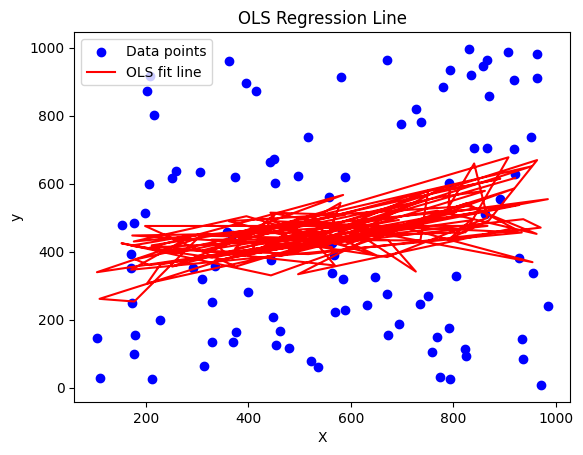

In [58]:
x = df['Production volumes']
# Make predictions
predictions = model.predict(X)

#We need to make sure the shape of each variable matches to prevent errors. 

print(x.shape) 
print(y.shape)

# Plot the data and the regression line
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, predictions, color='red', label='OLS fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('OLS Regression Line')
plt.show()

Interpretation: With Production volumes being the most significant between all other variable, the render would indicate that there is at least some significance in determining the 
number of units sold., Since the X seems to increase as Y increases, we can determine that there is a positive relationship between the X and Y Variables.

In other words, the more production, the more units sold (of course).

### Mutiple Linear Regression Model:

Now that we have and Idea of each significance and how the data from Production Numbers behave in relation to products sold, we move on to see how procucts sold behave in relation to all independent variables.

First, we need to change the string values in the independent variables into categories:

In specific, there are 8 variables that need to be converted into categories: 
1)Product type
2)Customer demographics
3)Location
4)Inspection results
5)Routes
6)Transpotation modes
7)Supplier name 
8)Shipping carriers


In [59]:
df['Product type'] = df['Product type'].astype('category')
df['Product type'] = df['Product type'].cat.codes

df['Customer demographics'] = df['Customer demographics'].astype('category')
df['Customer demographics'] = df['Customer demographics'].cat.codes

df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

df['Inspection results'] = df['Inspection results'].astype('category')
df['Inspection results'] = df['Inspection results'].cat.codes

df['Routes'] = df['Routes'].astype('category')
df['Routes'] = df['Routes'].cat.codes

df['Transportation modes'] = df['Transportation modes'].astype('category')
df['Transportation modes'] = df['Transportation modes'].cat.codes

df['Supplier name'] = df['Supplier name'].astype('category')
df['Supplier name'] = df['Supplier name'].cat.codes

df['Shipping carriers'] = df['Shipping carriers'].astype('category')
df['Shipping carriers'] = df['Shipping carriers'].cat.codes
 
df= df.drop(columns='SKU')

X = df.drop(columns="Number of products sold")
Y = df['Number of products sold']
print(X.head(5))


   Product type      Price  Availability  Revenue generated  \
0             1  69.808006            55        8661.996792   
1             2  14.843523            95        7460.900065   
2             1  11.319683            34        9577.749626   
3             2  61.163343            68        7766.836426   
4             2   4.805496            26        2686.505152   

   Customer demographics  Stock levels  Lead times  Order quantities  \
0                      2            58           7                96   
1                      0            53          30                37   
2                      3             1          10                88   
3                      2            23          13                59   
4                      2             5           3                56   

   Shipping times  Shipping carriers  ...  Location  Lead time  \
0               4                  1  ...         4         29   
1               2                  0  ...         4     

We also need to split our testing and traning data:

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=0) ##This will split the test size to 30% of the total dataframe, using 70% for training the model.

With Our variables set up, we can now train the model using the SKlearn.linear_model library

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression()

In [65]:
#We use lr.intercept to find the y intercept of the model (aka the base value of the model)
c = lr.intercept_
c  

np.float64(74.78318184751453)

In [66]:
#We use lr.coef_ to find the x coefficients:

m = lr.coef_
m

array([ 6.18302729e+01,  6.26272190e-01,  1.62702724e+00,  4.01825949e-03,
       -4.64248472e+00, -6.49756191e-01,  6.94532349e-01, -2.85602197e-01,
        1.41758216e+01, -5.25060493e+01, -6.36763790e+00, -1.43889227e+00,
        6.97121752e+01, -3.30484266e+00,  2.10278669e-01, -4.64838594e+00,
        6.02989636e-01,  8.38558907e+01, -5.77691740e+00, -8.57053459e+00,
       -4.40980035e+01,  1.32073460e-01])

In [68]:
##We can now use the lr.predict fucntion to predict y based on x inputs from training set
y_pred_train = lr.predict(X_train)

y_pred_train

array([569.63214959, 400.16100942, 530.64569708, 320.06874801,
       381.05205707, 370.94783712, 560.30226761, 692.1811227 ,
       590.01563103, 646.4929184 , 668.96422079, 389.6168012 ,
       296.20988431, 553.38311426, 672.05508706, 518.00670684,
       323.85215876, 897.47162941, 678.99255655, 122.06996997,
       488.73834977, 328.585259  , 468.87416884, 702.56337012,
       320.66474303, 381.14064355, 729.71807459, 386.35540226,
       557.62738386, 589.93769717, 519.90594517, 510.23651029,
       646.76051112, 488.98092234, 330.32491563, 317.73403754,
       588.59694658, 483.82887272, 724.52936861, 454.60208694,
       408.59556623, 420.90238378, 148.67712508, 670.16961593,
       625.32427879, 748.78951306, 444.30435063, 625.75684975,
       453.49211279, 406.90433735, 570.93310863, 743.6195236 ,
       498.67751803, 535.86036537, 513.53746212, 373.73108024,
       529.09460224, 523.72258677, 823.804115  , 315.70884716,
       378.65333206, 338.66500991, 539.41223737, 442.10

Now we can visualise the trained model using matplotlib to compare our trained modeel against the actual data:

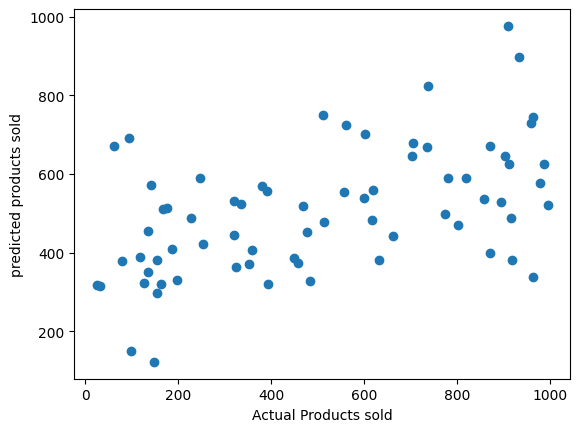

In [69]:
import matplotlib.pyplot as plt
plt.scatter(Y_train,y_pred_train)
plt.xlabel("Actual Products sold")
plt.ylabel("predicted products sold")
plt.show()

Based on the scatter plot, we can determine the following:
1) The spread of the scatter points are far apart, indicating a weak relationship between the model and acutal values.
2) Relative to the model, there does not seem to be any significant outliers since there isnt a strong relationship in the first place. 
3) If you squint your eyes, you can see the slightest positive slope present in the scatterplot, which indicates that as indepentent variables increase, dependent variables increase.


Now that we have our scatter plot, lets use r2 scoring to further our review of the model (i.e. seeing how well the data fits to the regression line,):  

In [70]:
from sklearn.metrics import r2_score

r2_score(Y_train, y_pred_train)



0.2676819978363518

For reference, the the r2 value lies beteen 0 to 1, which is the scale of how much of the independent variable can be explained by the dependent variables. 

with a score of 0.267, we can safely assume that this model is not reliable for predicting number of units sold. 

In conclusion, we have found some interesting behaviors when it comes do predicting Y with independent variables. 

While this is not a reliable model for prediction, this can definetly point us to the next steps:
1- If we wanted to refine this model, we can filter out some of the less significant variables based on P-values generated and train our model with more significant variables.
2- We would definently need a larger dataset since a lot of the values are skewed due to lack of observations presenet in the dataset. 
3- We can also try to predict the revenue as an alternative to determining profitability based on a set of independent variables in this dataset. 
